# K Means clustering algorithm

K Means is an unsupervised clustering learning algorithm.In this notebook K Means has been implemented from scratch on the iris dataset.
Steps to implement K Means-:
1. Select k random points as cluster centers.
2. Compute the euclidean distance of all the points from the centers(centroids) and assign it to the nearest cluster(center).
3. Compute the mean of the points in a cluster and the mean value becomes the new cluster center.
4. Keep on repeating 2 and 3 until the centroids do not change.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from copy import deepcopy

In [2]:
data=pd.read_csv("/home/sourojit/tfmodel/Iris.csv")

In [3]:
data.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Handling the Data

The iris dataset contains 4 features and a label.The label denotes the species to which each sample belongs.Since, K Means is an unsupervised learning algorithm we remove the labels column.

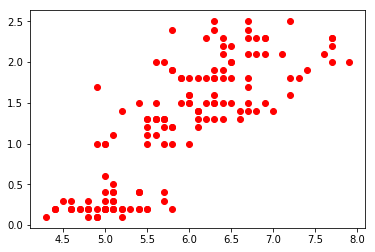

In [4]:
x_point=data["SepalLength"].values
y_point=data["PetalWidth"].values
points=np.array(list(zip(x_point,y_point)))
plt.scatter(x_point,y_point,c="red")
plt.show()

We randomly select two features to work on which gives the best distribution of points.This is important as we want our clusters to be distinctly visible to the naked eye when we plot the data. 

In [5]:
clusters=3

In [6]:
points.shape

(150, 2)

In [7]:
centroid_x=[5,5,7.5]
centroid_y=[0,1,1.5]

Selecting centers randomly

In [8]:
centroid=np.array(list(zip(centroid_x,centroid_y)))

In [9]:
centroid

array([[ 5. ,  0. ],
       [ 5. ,  1. ],
       [ 7.5,  1.5]])

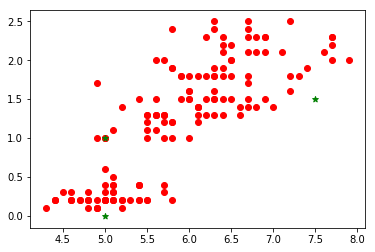

In [30]:
plt.scatter(x_point,y_point,c="red")
plt.scatter(centroid_x,centroid_y,marker="*",c='g')
plt.show()

Points plotted along with the initial centroids

In [11]:
centroid_old=np.zeros(centroid.shape)

In [12]:
cluster=np.zeros(len(points))

In [13]:
error=np.linalg.norm(centroid-centroid_old)

In [14]:
error

10.464224768228174

The error term denotes the difference between the centroids in the current iteration and the previous iteration.This term is important because it will determine if our cluster centroids have converged or not.

# K Means Algorithm

In each iteration of the while loop each sample is being assigned to its nearest cluster centroid.After each sample has been asigned to a centroid, a new centroid is computed by taking the mean of all the samples assigned to a specific cluster.This is done for all clusters.

In [15]:
while error!=0:
    for i in range(len(points)):
        distance=[np.linalg.norm(points[i]-centroids) for centroids in centroid]
        c=distance.index(min(distance))
        cluster[i]=c
    centroid_old=deepcopy(centroid)    
    for i in range(len(centroid)):
        cluster_points=[]
        for j in range(len(cluster)):
            if cluster[j]==i:
                cluster_points.append(points[j])
        centroid[i]=np.mean(cluster_points,axis=0)
        centroid[i]
    error=np.linalg.norm(centroid-centroid_old)
        

In [16]:
error

0.0

In [17]:
centroid

array([[ 5.00377358,  0.28679245],
       [ 5.83529412,  1.44509804],
       [ 6.81956522,  1.97608696]])

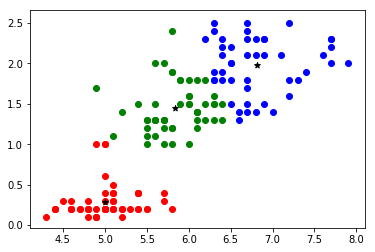

In [29]:
colors=['r','g','b']
ax = plt.subplot()
for i in range(clusters):
    cluster_points=np.array([points[j] for j in range(len(points)) if cluster[j]==i])
    ax.scatter(cluster_points[:,0],cluster_points[:,1],c=colors[i])
ax.scatter(centroid[:,0],centroid[:,1],marker="*",c="black")
plt.show()